<center>
<img src="../../img/ml_theme.png">
# Дополнительное профессиональное <br> образование НИУ ВШЭ
#### Программа "Практический анализ данных и машинное обучение"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
</center>
Материал распространяется на условиях лицензии <a href="https://opensource.org/licenses/MS-RL">Ms-RL</a>. Можно использовать в любых целях, кроме коммерческих, но с обязательным упоминанием автора материала. Автор материала: старший преподаватель Факультета Компьютерных Наук ВШЭ, программист-исследователь Mail.ru Group  Юрий Кашницкий

# <center>Занятие 2. Визуальный анализ данных
## <center>Часть 2. Обзор библиотеки Matplotlib

**Matplotlib** - это пакет для Python, предоставляющий множество возможностей для визуализации различных данных и результатов научных исследований. Обычно для несложных рисунков используется его интерфейс pyplot в связке с Numpy. Для начала c помощью директивы %matplotlib inline укажем IPython, чтобы рисунки отображались прямо в тетрадке, а не в новом окне. После этого импортируем интерфейс pyplot. 

In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')
%pylab inline
%matplotlib inline
#import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
figsize(10, 8)
plt.style.use("seaborn-darkgrid")

Populating the interactive namespace from numpy and matplotlib


### Базовый метод matplotlib.pyplot.plot

Многие графики могут быть построены при помощи метода  **matplotlib.pyplot.plot**. Аналогичный метод у объектов типа DataFrame и Series из пакета pandas - это просто обёртка для этого метода. Рассмотрим его работу на простых примерах.

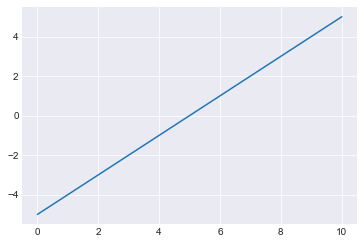

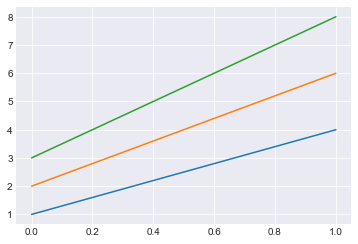

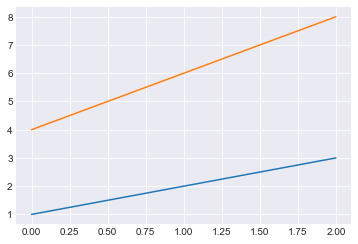

In [3]:
plt.plot(np.arange(-5, 6)) # plotting np.array vs. its indicies
plt.show()
X = np.array([[1, 2, 3],[4, 6,8]])
plt.plot(X) # plotting np.ndarray rows vs. its indicies
plt.show()
plt.plot(X.T) # see the difference
plt.show()

Обычно нас будут интересовать графики функций вида $y = f(x)$, например, график ошибки классификатора $e = f(\alpha)$ как фунцкии от некоторого настраиваемого параметра $\alpha$. Для построения графика функции $y = f(x)$ необходимо вызывать plot с двумя параметрами plot(x, f(x)). При этом удобно задавать диапазон переменной c помощью метода numpy.linspace.

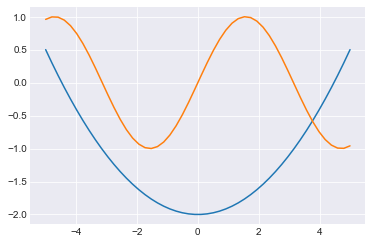

In [4]:
x = np.linspace(-5, 5, 50)
plt.plot(x, x**2 / 10.0 - 2)
plt.plot(x, np.sin(x)) # plotting on the same figure
plt.show()

Полученный выше график имеет явные недостатки:
- по оси х имеются пустые участки графиков (например, при значениях x от 5 до 6)
- по оси у графики упираются в границы координатной сетки, что не всегда удобно 
- оси не имеют названий, как и сами графики

Исправим их.

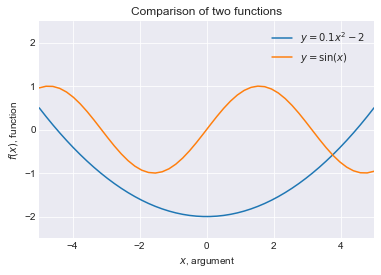

In [6]:
plt.plot(x, x**2 / 10.0 - 2, label = r"$y = 0.1 x^2 - 2$") # label is needed for legend
plt.plot(x, np.sin(x), label = r"$y = \sin(x)$") 
# Label for x-axis. Note: LaTeX can be used inside.
plt.xlabel(r"$x$, argument") 
plt.ylabel(r"$f(x)$, function") # Label for y-axis.
plt.title('Comparison of two functions')
plt.legend(loc = 'upper right') # loc stands for 'location' of legend
plt.xlim((-5, 5)) # Setting limits for x-axis
plt.ylim((-2.5, 2.5)) # and y-axis
plt.show()

Рассмотрим ещё некоторые из основных параметров метода plot, которые позволяют строить более разнообразные графики. 

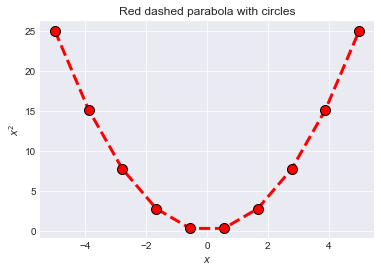

In [7]:
x = np.linspace(-5, 5, 10)
plt.plot(x, x**2, color = 'red', linestyle = 'dashed', marker = 'o',
         markeredgecolor = 'black', markersize = 10, 
         linewidth = 3, label = r"$y = x^2$")
plt.xlabel(r"$x$")
plt.ylabel(r"$x^2$")
plt.title('Red dashed parabola with circles')
plt.show()

Как построить несколько разных графиков и расположить их так, как нам нужно? Для этого нужно использовать метод subplot. Первые два аргумента указывают размеры сетки, третий аргумент указывает номер подграфика в этой сетке (нумерация идет слева направо и сверху вниз). Для изменения размера используется метод figure. Полученное изображение можно сохранить с помощью savefig.

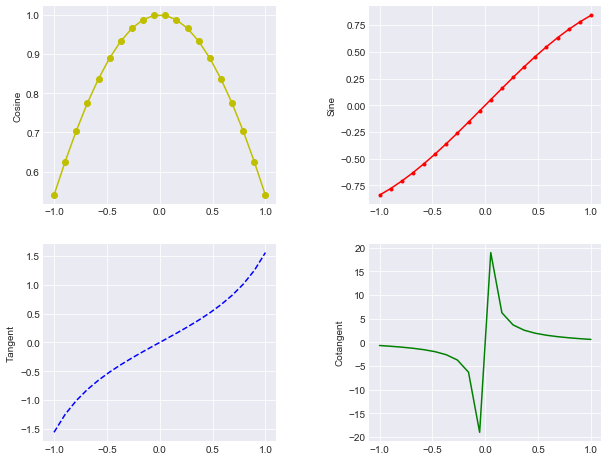

In [8]:
x = np.linspace(-1.0, 1.0, 20)

y1 = np.cos(x)
y2 = np.sin(x)
y3 = np.tan(x)
y4 = y1/y2

plt.figure(figsize = (10,8)) # Creates new figure with given size

plt.subplot(2, 2, 1) # Upper left corner
plt.plot(x, y1, 'yo-')
plt.ylabel('Cosine')

plt.subplot(2, 2, 2) # Upper right corner
plt.plot(x, y2, 'r.-')
plt.ylabel('Sine')

plt.subplot(2, 2, 3) # Lower left corner
plt.plot(x, y3, 'b--')
plt.ylabel('Tangent')

plt.subplot(2, 2, 4) # Lower right corner
plt.plot(x, y4, 'g')
plt.ylabel('Cotangent')

plt.subplots_adjust(wspace = 0.4, hspace = 0.2) # Adjust the distance between the subplots

plt.savefig('../../img/trigonometry.png', dpi = 200) # Saving the image
plt.show()

### Более продвинутое рисование с помощью figure

Для более продвинутых рисунков рекомендуется использовать объект **fig** класса **Figure**, возвращаемый методом **figure**, и работать непосредственно с ним. С его помощью создаем новый объект **ax**. Выглядит более громоздко, однако это позволяет более детально контролировать графики, оси и всё, что с ними связано.

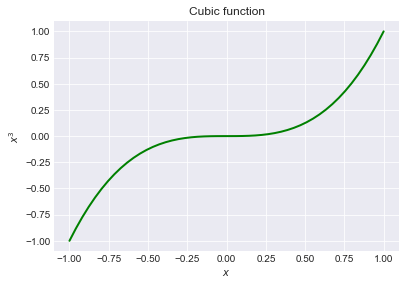

In [9]:
fig = plt.figure()
# Positions of axes in figure: left, bottom, width, height (range 0 to 1)
ax = fig.add_axes([0., 0.1, 0.8, 0.8]) 

x = np.linspace(-1, 1)
ax.plot(x, x**3, 'g', linewidth = 2)

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$x^3$")
ax.set_title('Cubic function');

Если конкретное положение осей на рисунке нам не важно, мы можем использовать объект **ax**, возвращаемый стандартными методами **matplotlib**. Использование **fig, ax** также удобно при наличии нескольких рисунков, с каждым из которых нужно работать отдельно.

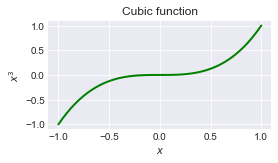

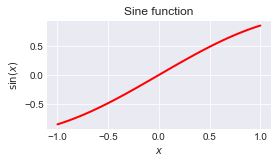

In [11]:
fig1, ax1 = plt.subplots(figsize = (4, 2))

ax1.plot(x, x**3, 'g', linewidth = 2)

ax1.set_xlabel(r"$x$")
ax1.set_ylabel(r"$x^3$")
ax1.set_title('Cubic function');

# Creates new figure, independent from previous.
fig2, ax2 = plt.subplots(figsize = (4, 2)) 
# So we can work with them separately.
x = np.linspace(-1, 1)
ax2.plot(x, np.sin(x), 'r', linewidth = 2)

ax2.set_xlabel(r"$x$")
ax2.set_ylabel(r"$\sin(x)$")
ax2.set_title('Sine function');

Можно добавить координатную сетку. Отметим, что при использовании **subplots**, объект **ax** представляет собой массив.

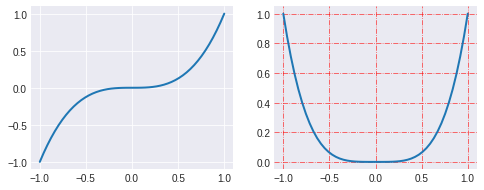

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (8, 3))

ax[0].plot(x, x**3, linewidth = 2)
ax[0].grid(True) # Default grid

ax[1].plot(x, x**4, linewidth = 2)
ax[1].grid(color = 'r', alpha = 0.7, linestyle = '-.') # Custom grid

Полезной является команда **subplot2grid**, позволяющая объединять несколько графиков в более сложные композиции (по сравнению с **subplot**). Метод **tight_layout** используется для автоматического выбора позиций осей, так чтобы графики (и подписи) не наслаивались друг на друга.

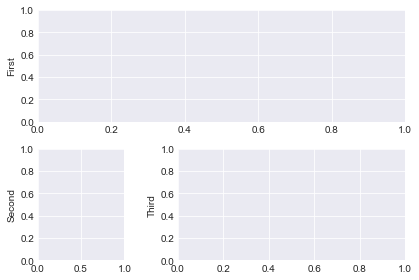

In [12]:
fig = plt.figure()
# Arguments: shape, position and spanning in each (row or col) direction
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=3) 
ax1.set_ylabel('First')
ax2 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
ax2.set_ylabel('Second')
ax3 = plt.subplot2grid((2, 3), (1, 1), colspan=2)
ax3.set_ylabel('Third')
# Automatically adjusts the positions of the axes to prevent overlapping
fig.tight_layout() 

### Другие виды графиков

Помимо **plot** существует множество других видов графиков, которые могут оказаться более наглядными при работе с данными.

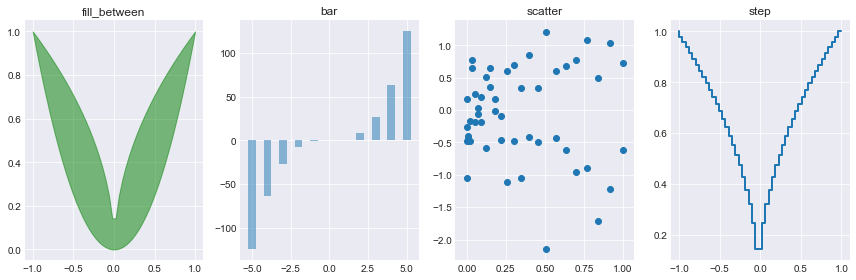

In [13]:
fig, axes = plt.subplots(1, 4, figsize = (12, 4))

axes[0].fill_between(x, np.sqrt(np.abs(x)), x**2, 
                     color="green", alpha=0.5);
axes[0].set_title("fill_between");

axes[1].bar(np.arange(-5, 6), np.arange(-5, 6)**3, 
            align="center", width=0.5, alpha=0.5)
axes[1].set_title("bar")

axes[2].scatter(x**2, x + 0.5 * np.random.randn(len(x)))
axes[2].set_title("scatter")

axes[3].step(x, np.sqrt(np.abs(x)), lw=2)
axes[3].set_title("step")

fig.tight_layout()

Особого внимания заслуживают методы **hist** и **pie**, использующийся для построения гистограмм и **pie-chart** графиков.

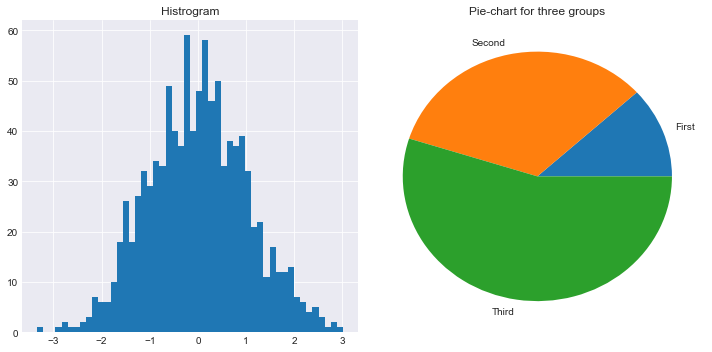

In [14]:
data = np.random.randn(1000)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].hist(data, bins = 50)
ax[0].set_title('Histrogram')

ax[1].pie(np.array([12, 34, 56]), labels = ['First', 'Second', 'Third'])
ax[1].set_title('Pie-chart for three groups')

fig.tight_layout()

## Ссылки:
   - [Галерея](http://matplotlib.org/gallery.html) примеров визуализации с Matplotlib 
   - [Обзор](https://habrahabr.ru/post/270449/) полезных репозиториев, включая тетрадки по визуализации